<a href="https://colab.research.google.com/github/matthewlai12/ECE-Lab/blob/main/ECE449Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ECE 449 Lab 4: Matthew Lai
In this lab, our goal is to use the skfuzzy library to build a fuzzy tree. This fuzzy tree will be used to recommend a tip amount at a restaurant. We will accept two inputs "Food Quality" as well as "Service Quality". Our fuzzy tree wil compute these inputs, and then feed the results into the "Tipper" rulebase.

Our approach to this lab is to have two stages of FIS. Our first stage will calculate "Food Quality" by three metrics of food temperature, flavor, and portion size, while our "Service Quality" metric will be measured by attentiveness, friendliness, and speed of service. These results will feed into our second stage, where we will calculate the tip amount based on the above qualities.

##Preliminary Installations and Imports:
We are installing the scikit-fuzzy library and importing the control module.

In [1]:
!pip install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

##Section 1: Fuzzy Variables Setup and Membership Functions
In this section we will define our Antecedents and Consequents. We will also define and view Membership Functions

###Defining our Antecendents:

In [2]:
# Function to define our antecedents
def antecedents():
  # Food Quality Antecedents
  temperature = ctrl.Antecedent(np.linspace(0, 10, 11),'temperature')
  flavor = ctrl.Antecedent(np.linspace(0, 10, 11),'flavor')
  portion_size = ctrl.Antecedent(np.linspace(0, 10, 11),'portion_size')
  # Service Quality Antecedents:
  attentiveness = ctrl.Antecedent(np.linspace(0, 10, 11),'attentiveness')
  friendliness = ctrl.Antecedent(np.linspace(0, 10, 11),'friendliness')
  speed_of_service = ctrl.Antecedent(np.linspace(0, 10, 11),'speed_of_service')

  # #Antecedents for the second stage
  food_quality_input = ctrl.Antecedent(np.linspace(0, 10, 11),'food_quality_input')
  service_quality_input = ctrl.Antecedent(np.linspace(0, 10, 11),'service_quality_input')
  return temperature, flavor, portion_size, attentiveness, friendliness, speed_of_service, food_quality_input, service_quality_input

temperature, flavor, portion_size, attentiveness, friendliness, speed_of_service, food_quality_input, service_quality_input = antecedents()

###Defining our Consequents:

In [3]:
# Function to define our consequents
def consequents():
  # Food Quality Consequents
  food_quality_output = ctrl.Consequent(np.linspace(0, 10, 11),'food_quality_output')
  # Service Quality Consequents
  service_quality_output = ctrl.Consequent(np.linspace(0, 10, 11),'service_quality_output')

  # Second Stage Consequents
  tip = ctrl.Consequent(np.linspace(0, 25, 26),'tip')
  return food_quality_output, service_quality_output, tip

food_quality_output, service_quality_output, tip = consequents()

###Defining our Membership Functions:

In [4]:
# Function to define membership functions
def membership_functions(temperature, flavor, portion_size, attentiveness, friendliness, speed_of_service, food_quality_input, service_quality_input, food_quality_output, service_quality_output, tip):
  temperature.automf(3)
  flavor.automf(3)
  portion_size.automf(3)

  attentiveness.automf(3)
  friendliness.automf(3)
  speed_of_service.automf(3)

  food_quality_input.automf(3)
  service_quality_input.automf(3)

  food_quality_output.automf(3)
  service_quality_output.automf(3)

  tip.automf(3)

membership_functions(temperature, flavor, portion_size, attentiveness, friendliness, speed_of_service, food_quality_input, service_quality_input, food_quality_output, service_quality_output, tip)


###Viewing our Membership Functions:

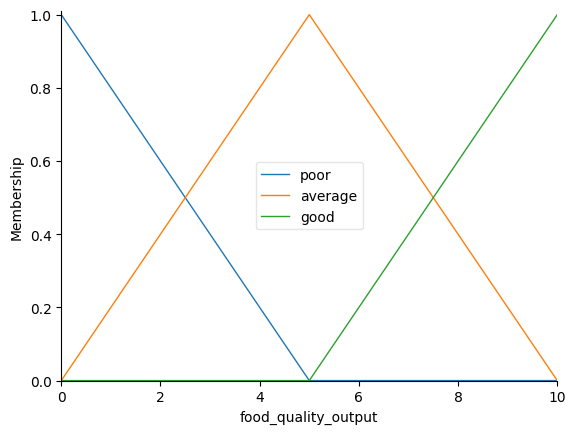

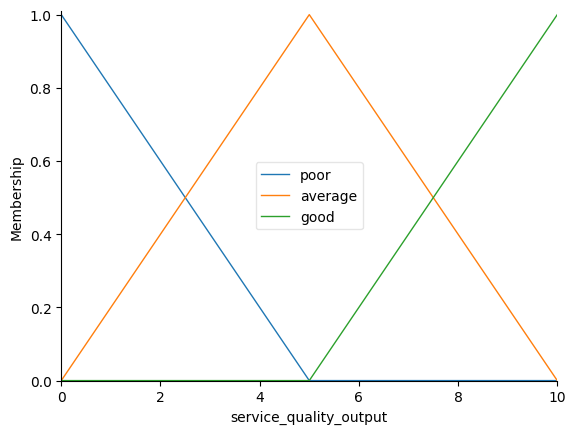

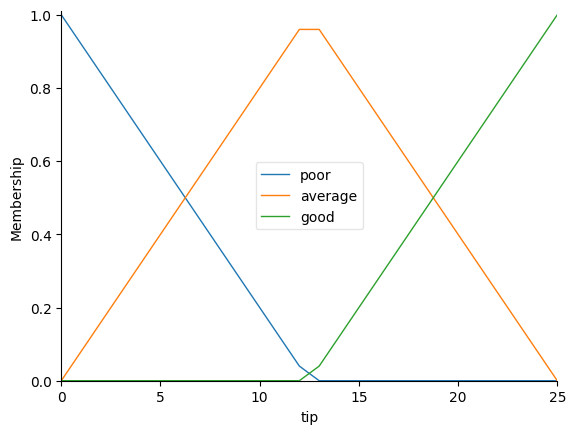

In [5]:
# Function to view our membership functions
def view_membership_functions(food_quality_output, service_quality_output, tip):
  food_quality_output.view()
  service_quality_output.view()
  tip.view()

view_membership_functions(food_quality_output, service_quality_output, tip)

##Section 2: Fuzzy Rules and Controller
In this section, we will create our rules for our fuzzy system. Outlined in the lab presentation, we will start with our first stage and then make our rules for the second stage.

###Rules for our Fuzzy System:
Food Rules:
1. If temperature or flavor or portion size is "Poor", then "Food Quality" is "Poor"
2. If temperature and flavor and portion size is "Average", then "Food Quality" is "Average"
3. If temperature and flavor and portion size is "Good", then "Food Quality" is "Good"

Service Rules:
1. If attentiveness or friendliness or speed of service is "Poor", then "Service Quality" is "Poor".
2. If attentiveness and friendliness and speed of service is "Average", then "Service Quality" is "Average".
3. If attentiveness and friendliness and speed of service is "Good", then "Service Quality" is "Good".

Tipping Rules:
1. If "Food Quality" or "Service Quality" is "Poor", then "Tip" is "Poor".
2. If "Food Quality" and "Service Quality" is "Average", then "Tip" is "Average".
3. If "Food Quality" and "Service Quality" is "Good", then "Tip" is "Good".

###Implementing our Rules:

In [6]:
# Function to define our rules
def rules(temperature, flavor, portion_size, attentiveness, friendliness, speed_of_service, food_quality_input, service_quality_input, food_quality_output, service_quality_output):
  food_rule1 = ctrl.Rule(temperature['poor'] | flavor['poor'] | portion_size['poor'], food_quality_output['poor'])
  food_rule2 = ctrl.Rule(temperature['average'] & flavor['average'] & portion_size['average'], food_quality_output['average'])
  food_rule3 = ctrl.Rule(temperature['good'] & flavor['good'] & portion_size['good'], food_quality_output['good'])

  service_rule1 = ctrl.Rule(attentiveness['poor'] | friendliness['poor'] | speed_of_service['poor'], service_quality_output['poor'])
  service_rule2 = ctrl.Rule(attentiveness['average'] & friendliness['average'] & speed_of_service['average'], service_quality_output['average'])
  service_rule3 = ctrl.Rule(attentiveness['good'] & friendliness['good'] & speed_of_service['good'], service_quality_output['good'])

  tipping_rule1 = ctrl.Rule(food_quality_input['poor'] | service_quality_input['poor'], tip['poor'])
  tipping_rule2 = ctrl.Rule(food_quality_input['average'] & service_quality_input['average'], tip['average'])
  tipping_rule3 = ctrl.Rule(food_quality_input['good'] & service_quality_input['good'], tip['good'])

  return food_rule1, food_rule2, food_rule3, service_rule1, service_rule2, service_rule3, tipping_rule1, tipping_rule2, tipping_rule3

food_rule1, food_rule2, food_rule3, service_rule1, service_rule2, service_rule3, tipping_rule1, tipping_rule2, tipping_rule3 = rules(temperature, flavor, portion_size, attentiveness, friendliness, speed_of_service, food_quality_input, service_quality_input, food_quality_output, service_quality_output)

###Creating our Controller:

In [7]:
# Function to set our controllers and sims
def controller(food_rule1, food_rule2, food_rule3, service_rule1, service_rule2, service_rule3, tipping_rule1, tipping_rule2, tipping_rule3):
  food_quality_ctrl = ctrl.ControlSystem([food_rule1, food_rule2, food_rule3])
  food_quality_sim = ctrl.ControlSystemSimulation(food_quality_ctrl)

  service_quality_ctrl = ctrl.ControlSystem([service_rule1, service_rule2, service_rule3])
  service_quality_sim = ctrl.ControlSystemSimulation(service_quality_ctrl)

  tipping_ctrl = ctrl.ControlSystem([tipping_rule1, tipping_rule2, tipping_rule3])
  tipping_sim = ctrl.ControlSystemSimulation(tipping_ctrl)

  return food_quality_sim, service_quality_sim, tipping_sim

food_quality_sim, service_quality_sim, tipping_sim = controller(food_rule1, food_rule2, food_rule3, service_rule1, service_rule2, service_rule3, tipping_rule1, tipping_rule2, tipping_rule3)

##Section 3: Running our Simulation and Pipline
In this section, we will run our pipeline multiple times to see how it reacts

Enter temperature (0-10): 10
Enter flavor (0-10): 10
Enter portion size (0-10): 10
Enter attentiveness (0-10): 10
Enter friendliness (0-10): 10
Enter speed of service (0-10): 10

Results:
Food Quality: 8.33
Service Quality: 8.33
Tip Recommendation: 15.28



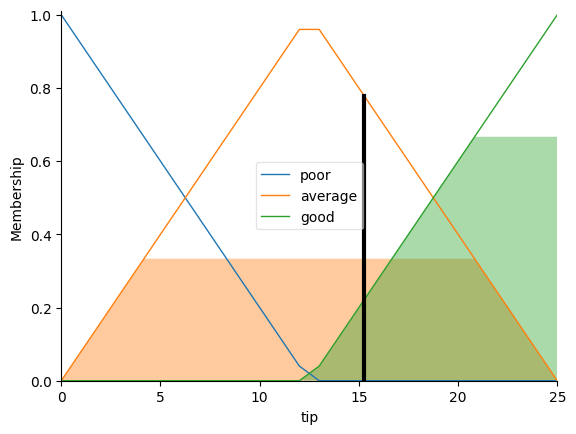

Do you want to perform another simulation? (yes/no): yes
Enter temperature (0-10): 0
Enter flavor (0-10): 0
Enter portion size (0-10): 0
Enter attentiveness (0-10): 0
Enter friendliness (0-10): 0
Enter speed of service (0-10): 0

Results:
Food Quality: 1.67
Service Quality: 1.67
Tip Recommendation: 9.72



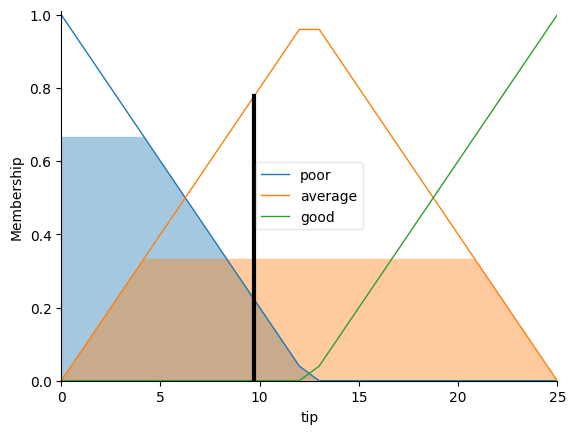

Do you want to perform another simulation? (yes/no): yes
Enter temperature (0-10): 5
Enter flavor (0-10): 5
Enter portion size (0-10): 5
Enter attentiveness (0-10): 5
Enter friendliness (0-10): 5
Enter speed of service (0-10): 5

Results:
Food Quality: 5.00
Service Quality: 5.00
Tip Recommendation: 12.50



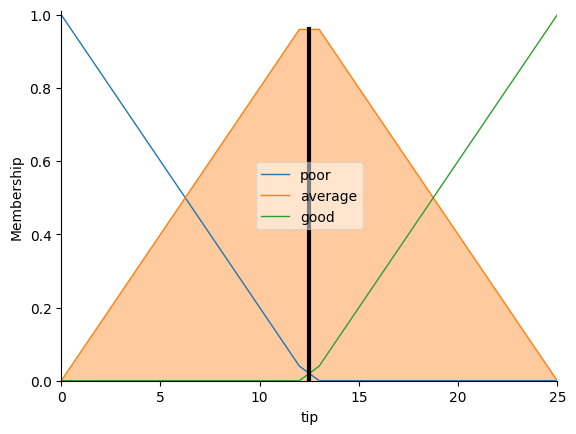

Do you want to perform another simulation? (yes/no): yes
Enter temperature (0-10): 0
Enter flavor (0-10): 5
Enter portion size (0-10): 10
Enter attentiveness (0-10): 0
Enter friendliness (0-10): 5
Enter speed of service (0-10): 10

Results:
Food Quality: 1.67
Service Quality: 1.67
Tip Recommendation: 9.72



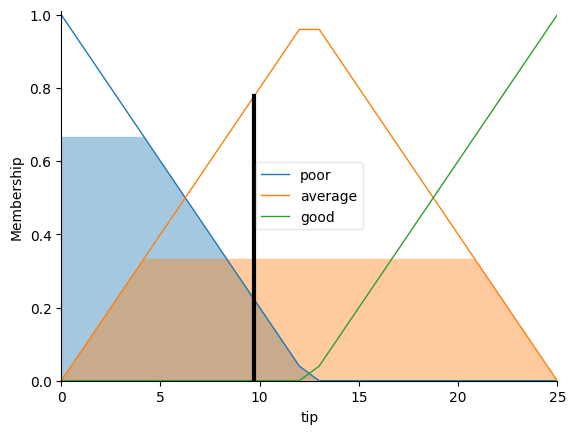

Do you want to perform another simulation? (yes/no): yes
Enter temperature (0-10): 7
Enter flavor (0-10): 10
Enter portion size (0-10): 10
Enter attentiveness (0-10): 7
Enter friendliness (0-10): 10
Enter speed of service (0-10): 10

Results:
Food Quality: 7.96
Service Quality: 7.96
Tip Recommendation: 14.63



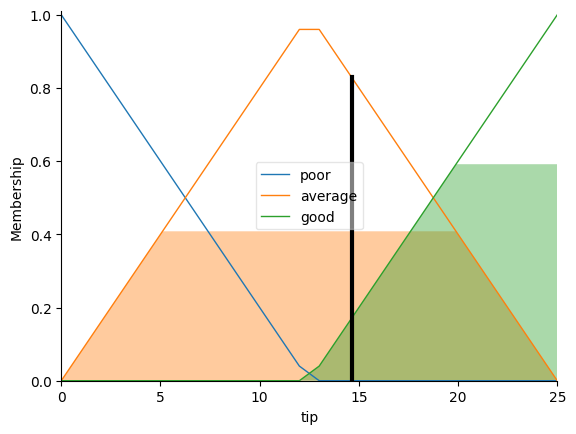

Do you want to perform another simulation? (yes/no): 9
Exiting simulation.


In [8]:
# Function to validate inputs
def get_valid_input(prompt, min_val=0, max_val=10):
    while True:
        try:
            value = float(input(prompt))
            if min_val <= value <= max_val:
                return value
            else:
                print(f"Please enter a value between {min_val} and {max_val}.")
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

plt.ion()  # Turn on interactive mode

# Start loop
while True:
    # Get the inputs
    temperature_val = get_valid_input("Enter temperature (0-10): ")
    flavor_val = get_valid_input("Enter flavor (0-10): ")
    portion_size_val = get_valid_input("Enter portion size (0-10): ")

    attentiveness_val = get_valid_input("Enter attentiveness (0-10): ")
    friendliness_val = get_valid_input("Enter friendliness (0-10): ")
    speed_of_service_val = get_valid_input("Enter speed of service (0-10): ")

    # Set the inputs
    food_quality_sim.input['temperature'] = temperature_val
    food_quality_sim.input['flavor'] = flavor_val
    food_quality_sim.input['portion_size'] = portion_size_val

    # Compute food_quality_sim
    food_quality_sim.compute()
    food_quality_output = food_quality_sim.output['food_quality_output']

    # Set the inputs
    service_quality_sim.input['attentiveness'] = attentiveness_val
    service_quality_sim.input['friendliness'] = friendliness_val
    service_quality_sim.input['speed_of_service'] = speed_of_service_val

    # Compute service_quality_sim
    service_quality_sim.compute()
    service_quality_output = service_quality_sim.output['service_quality_output']

    # Set inputs based on results above
    tipping_sim.input['food_quality_input'] = food_quality_output
    tipping_sim.input['service_quality_input'] = service_quality_output

    # Compute tip output
    tipping_sim.compute()
    tip_output = tipping_sim.output['tip']

    # Print results
    print("\nResults:")
    print(f"Food Quality: {food_quality_output:.2f}")
    print(f"Service Quality: {service_quality_output:.2f}")
    print(f"Tip Recommendation: {tip_output:.2f}\n")

    # Display tip
    tip.view(sim=tipping_sim)
    plt.show(block=False)
    plt.pause(0.1)

    # Continue or break the loop
    continue_simulation = input("Do you want to perform another simulation? (yes/no): ").strip().lower()
    if continue_simulation != "yes":
        print("Exiting simulation.")
        break


##Section 4: Conclusion
In this lab, we achieved our goal of creating a fuzzy tree, implemented by a two stage FIS. We accepted an input, and got our metrics of "Food Quality" and "Service Quality". We then fed these into our second stage and got our recomended tip.

###References:
- ECE 449 Lab 4 Manual
- ECE 449 Lab 4 Presentation
- ECE 449 Slides posted by Dr. Musilek
- ChatGPT: In this lab ChatGPT was used to help fix errors in my loop as well as to help validate inputs. I was having trouble displaying plots at the end.